In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from skimage.io import imread, imshow
from skimage.metrics import adapted_rand_error, variation_of_information
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.metrics import (homogeneity_score, silhouette_score, davies_bouldin_score, adjusted_rand_score, 
                             calinski_harabasz_score, adjusted_mutual_info_score, v_measure_score, 
                             completeness_score)
import cv2
from skfuzzy.cluster import cmeans
import itertools
import scipy
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation, k_means
from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings('ignore')

In [3]:
image = imread('/home/yaroslav/projects/ImageRecognition/Lab2/bacteries_1.jpg')
image1 = imread('/home/yaroslav/projects/ImageRecognition/Lab2/bacteries_2.jpg')

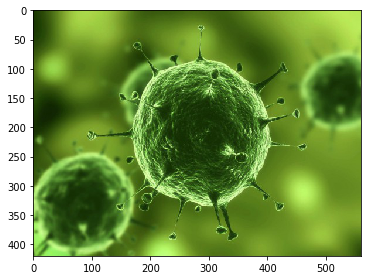

In [4]:
imshow(image);

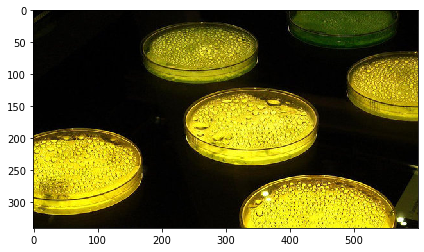

In [5]:
imshow(image1);

In [6]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

### Agglomerative Clustering

In [7]:
def resize_image(image, resize=4):
    image = image[::resize, ::resize] + image[1::resize, ::resize] + \
    image[::resize, 1::resize] + image[1::resize, 1::resize]
    
    return image

In [8]:
image_gray_resized = resize_image(image_gray)
image1_gray_resized = resize_image(image1_gray)

In [9]:
def agglomerative_clustering(image_gray, n_clusters, affinity='euclidean'):
    
    connectivity = grid_to_graph(*image_gray.shape)
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity,
                                                       connectivity=connectivity)
    
    agglomerative_clustering.fit(image_gray.reshape(-1, 1))
    labels = np.reshape(agglomerative_clustering.labels_, image_gray.shape)
    
    return labels

In [10]:
def plot_results_agglomerative_clustering(labels, n_clusters, ax):
    
    for nclusters in range(n_clusters):
        ax.contour(labels == nclusters, contours=1, colors=[plt.cm.get_cmap("Spectral")(nclusters / float(2)), ],
                   origin='image')
    
    plt.axis('off')
    plt.savefig('agglomerative_clustering_{}_clusters.png'.format(n_clusters), bbox_inches='tight', pad_inches=0)

#### First Image

In [11]:
labels_images = [agglomerative_clustering(image_gray_resized, nclusters) for nclusters in range(2, 10)]

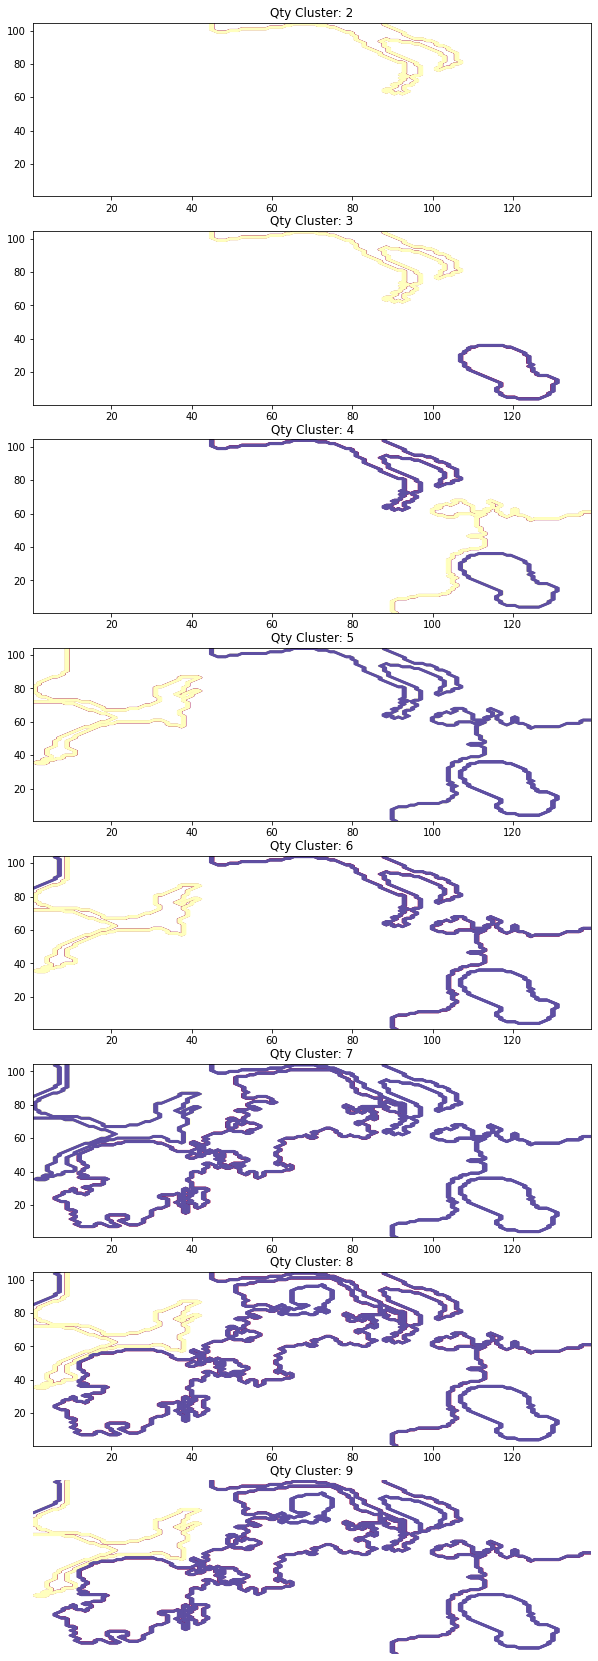

In [13]:
fig, axs = plt.subplots(nrows=len(range(2, 10)), ncols=1, figsize=(10, 30))

for idx, nclusters in enumerate(range(2, 10)):
    plot_results_agglomerative_clustering(labels_images[idx], nclusters, axs[idx]);
    axs[idx].set_title('Qty Cluster: {}'.format(nclusters))

#### Second Image

In [14]:
labels_images1 = [agglomerative_clustering(image1_gray_resized, nclusters) for nclusters in range(2, 10)]

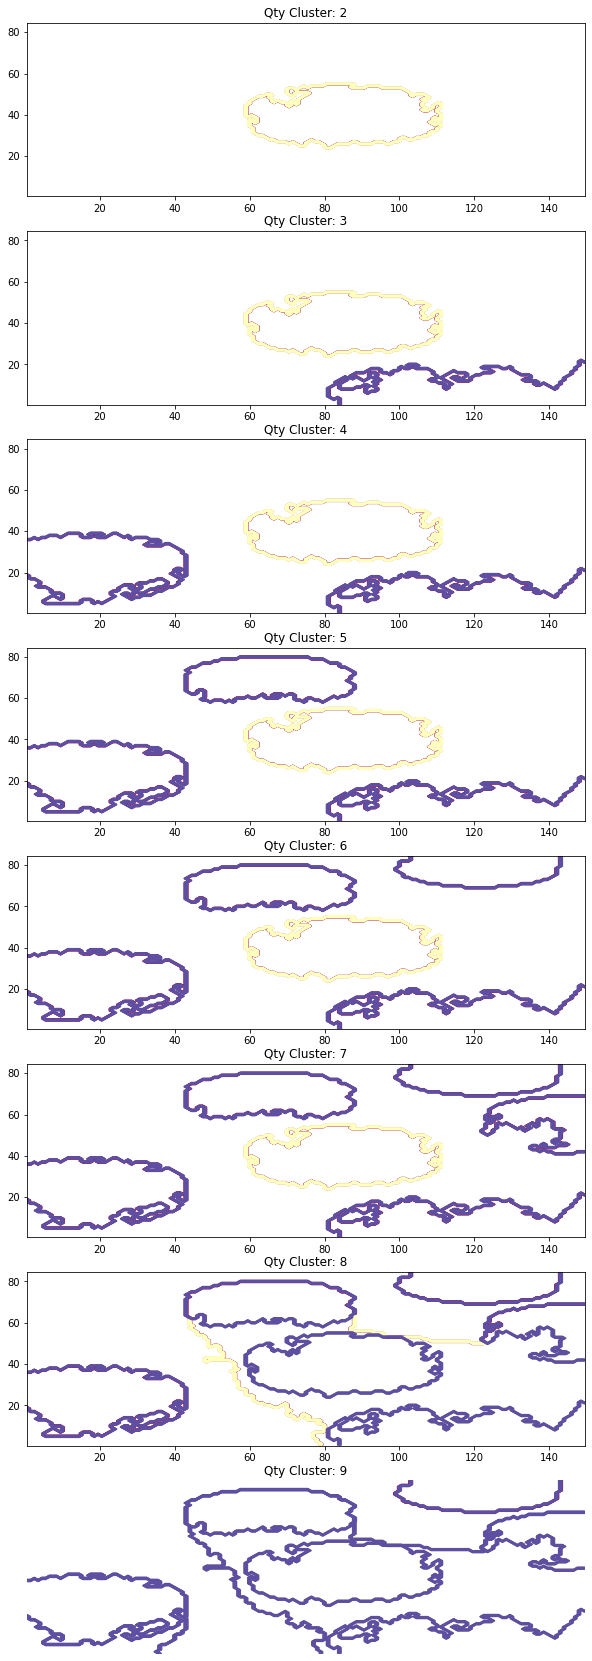

In [15]:
fig, axs = plt.subplots(nrows=len(range(2, 10)), ncols=1, figsize=(10, 30))

for idx, nclusters in enumerate(range(2, 10)):
    plot_results_agglomerative_clustering(labels_images1[idx], nclusters, axs[idx]);
    axs[idx].set_title('Qty Cluster: {}'.format(nclusters))

### Affinity Propagation

In [16]:
def affinity_propagation_clustering(image_gray, original_image_shape, damping, affinity='euclidean'):

    affinity_propagation = AffinityPropagation(damping=damping, affinity=affinity, random_state=42)
    
    affinity_propagation.fit(image_gray.reshape(-1, 1))
    print("Estimated number of clusters: {}".format(len(affinity_propagation.cluster_centers_indices_)))
    
    cluster_centers = affinity_propagation.cluster_centers_

    segmented_data = cluster_centers[affinity_propagation.labels_.flatten()] 
    segmented_image = segmented_data.reshape((original_image_shape))
    
    return segmented_image

In [17]:
def plot_results_affinity_propagation_clustering(segmented_image, ax):
    ax.imshow(segmented_image);

#### First Image

In [19]:
labels_images_affinity_propagation = [affinity_propagation_clustering(image_gray_resized, 
                                                                      image_gray_resized.shape, damping) 
                                      for damping in np.arange(0.5, 1, 0.2)]

KeyboardInterrupt: 

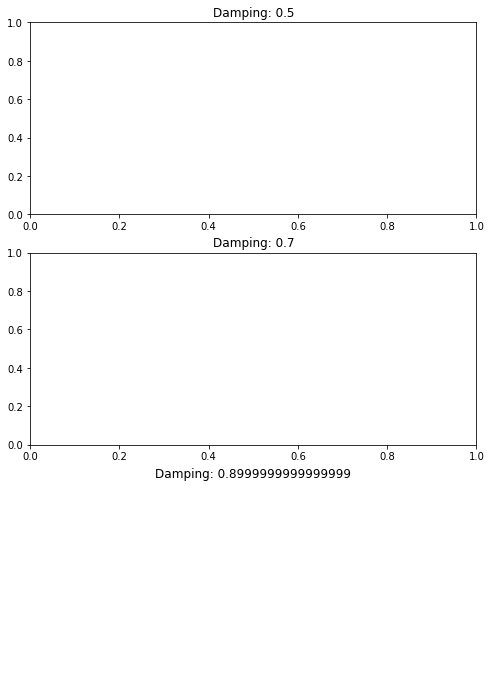

In [27]:
fig, axs = plt.subplots(nrows=len(np.arange(0.5, 1, 0.2)), ncols=1, figsize=(8, 12))

for idx, damping in enumerate(np.arange(0.5, 1, 0.2)):
    plot_results_affinity_propagation_clustering(image_gray_resized, labels_images_affinity_propagation[idx],
                                          damping, axs[idx]);
    axs[idx].set_title('Damping: {}'.format(damping))

#### Second Image

In [15]:
labels_images1_affinity_propagation = [affinity_propagation_clustering(image1_gray_resized, damping) 
                                      for damping in np.arange(0.5, 1, 0.2)]

Estimated number of clusters: 0
Estimated number of clusters: 0
Estimated number of clusters: 0


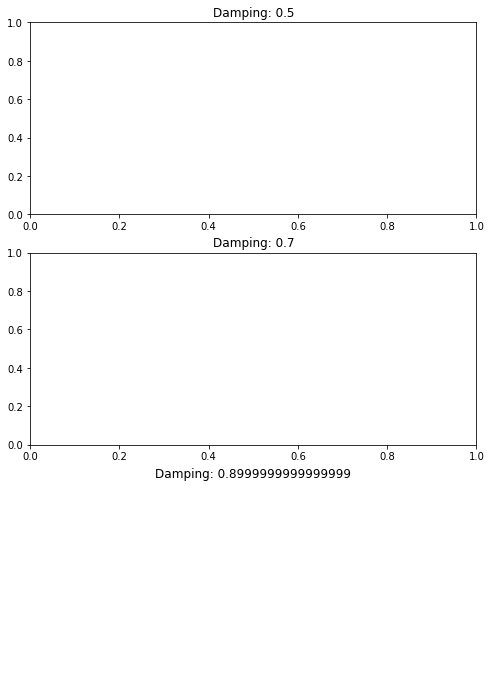

In [16]:
fig, axs = plt.subplots(nrows=len(np.arange(0.5, 1, 0.2)), ncols=1, figsize=(8, 12))

for idx, damping in enumerate(np.arange(0.5, 1, 0.2)):
    plot_results_affinity_propagation_clustering(image1_gray_resized, labels_images1_affinity_propagation[idx],
                                          damping, axs[idx]);
    axs[idx].set_title('Damping: {}'.format(damping))

### KMedoids Clustering

In [119]:
def kmedoids_clustering(image_gray, original_image_shape, n_clusters, metric='euclidean'):
    
    kmedoids_clustering = KMedoids(n_clusters=n_clusters, metric=metric, random_state=42)
    
    kmedoids_clustering.fit(image_gray.reshape(-1, 1))

    cluster_centers = kmedoids_clustering.cluster_centers_

    segmented_data = cluster_centers[kmedoids_clustering.labels_.flatten()] 
    segmented_image = segmented_data.reshape((original_image_shape))
    
    return segmented_image

In [120]:
def plot_results_kmedoids_clustering(segmented_image, ax):
    ax.imshow(segmented_image);

#### First Image

In [121]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [122]:
image_gray_resized = resize_image_gray(image_gray)

In [125]:
labels_images_kmedoids = [[kmedoids_clustering(image_gray_resized, image_gray_resized.shape, nclusters, metric) 
                           for nclusters in range(2, 10)] 
                          for metric in ('euclidean', 'l1', 'l2', 'manhattan', 'cosine')]

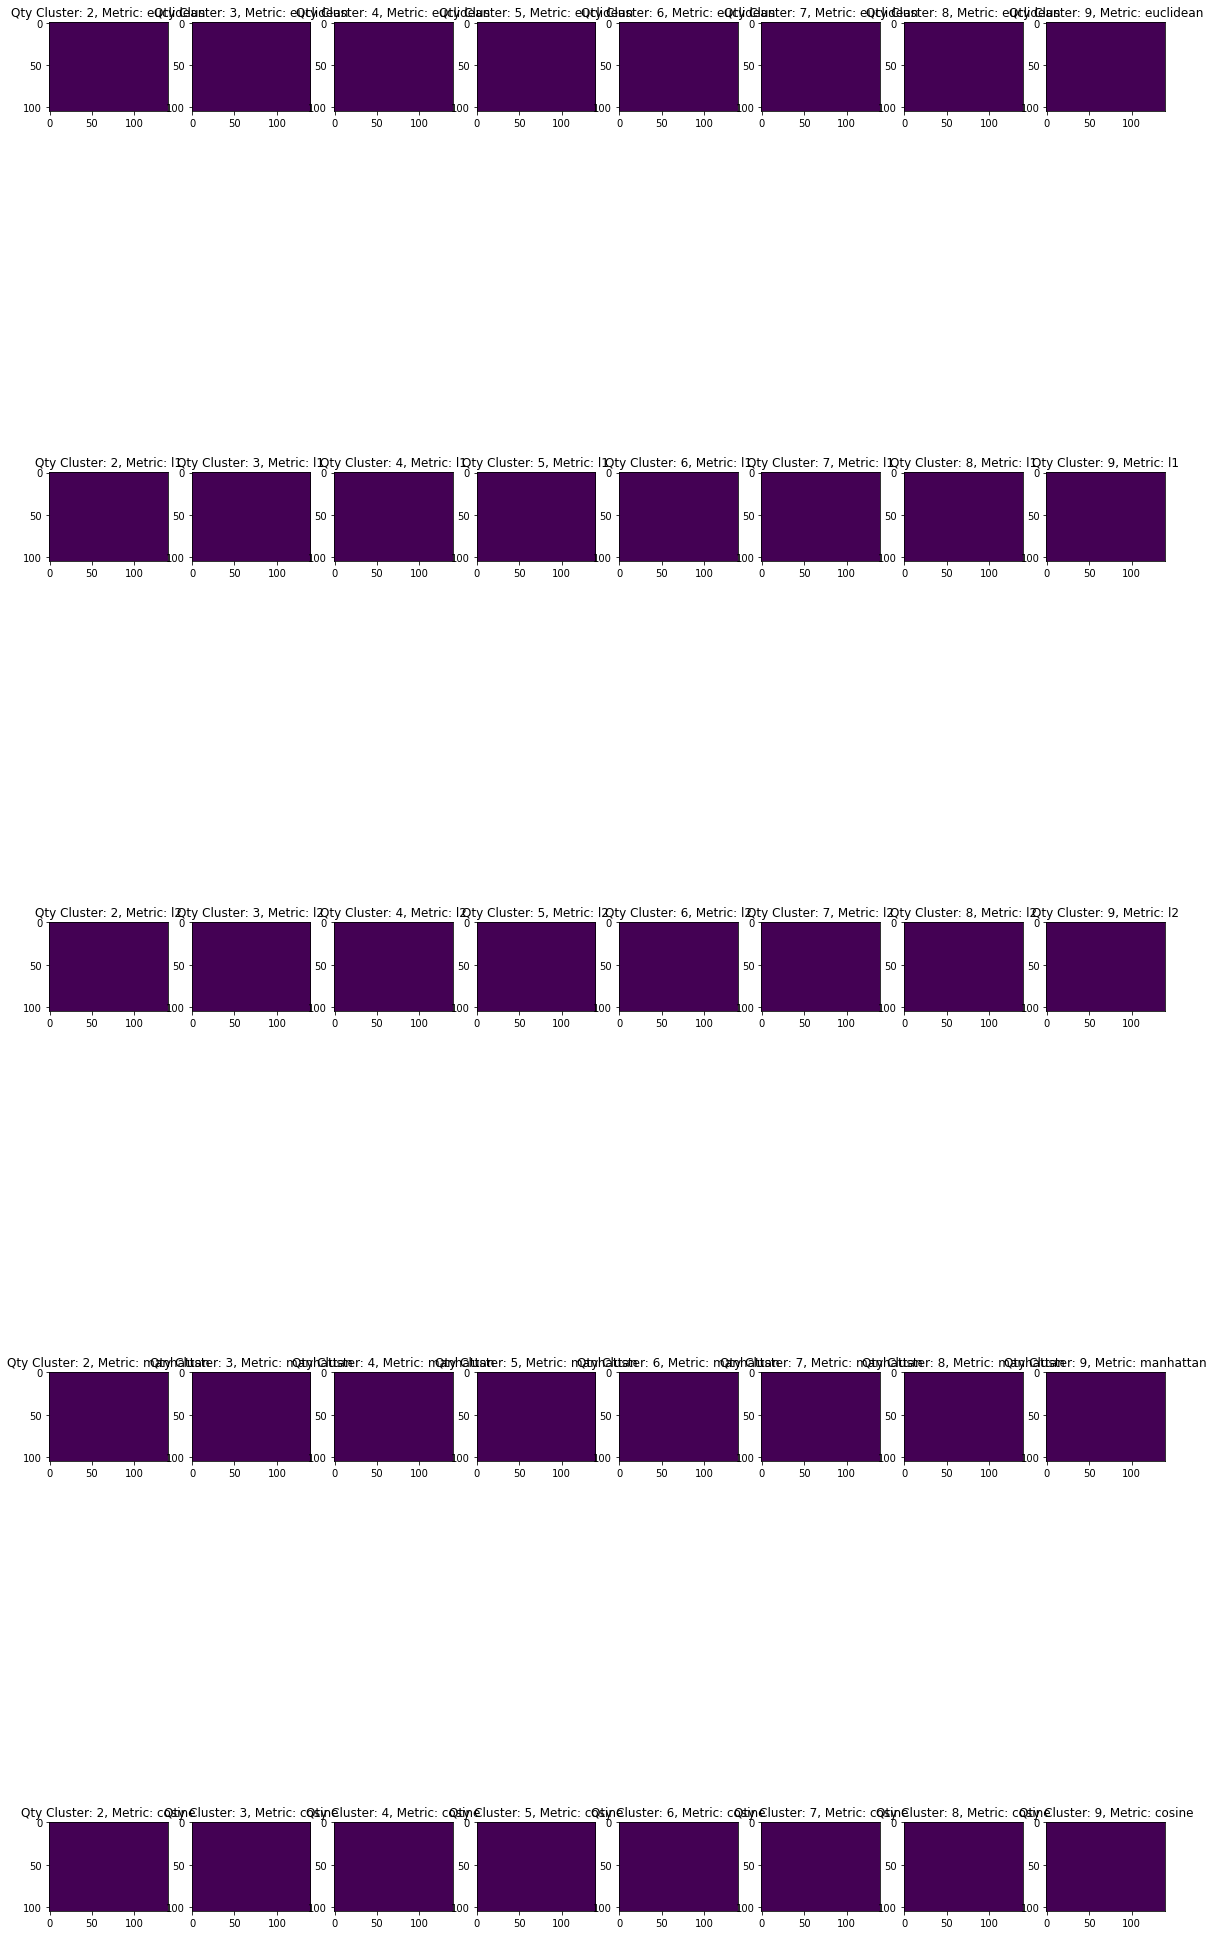

In [127]:
fig, axs = plt.subplots(nrows=5, ncols=len(range(2, 10)), figsize=(20, 40))

for idx, metric in enumerate(('euclidean', 'l1', 'l2', 'manhattan', 'cosine')):
    for jdx, nclusters in enumerate(range(2, 10)):
        plot_results_kmedoids_clustering(labels_images_kmedoids[idx][jdx], axs[idx][jdx]);
        axs[idx][jdx].set_title('Qty Cluster: {}, Metric: {}'.format(nclusters, metric))

#### Second Image

In [40]:
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

In [41]:
image1_gray_resized = resize_image_gray(image1_gray)

In [128]:
labels_images1_kmedoids = [[kmedoids_clustering(image1_gray_resized, image1_gray_resized.shape, nclusters, metric) 
                           for nclusters in range(2, 10)] 
                          for metric in ('euclidean', 'l1', 'l2', 'manhattan', 'cosine')]

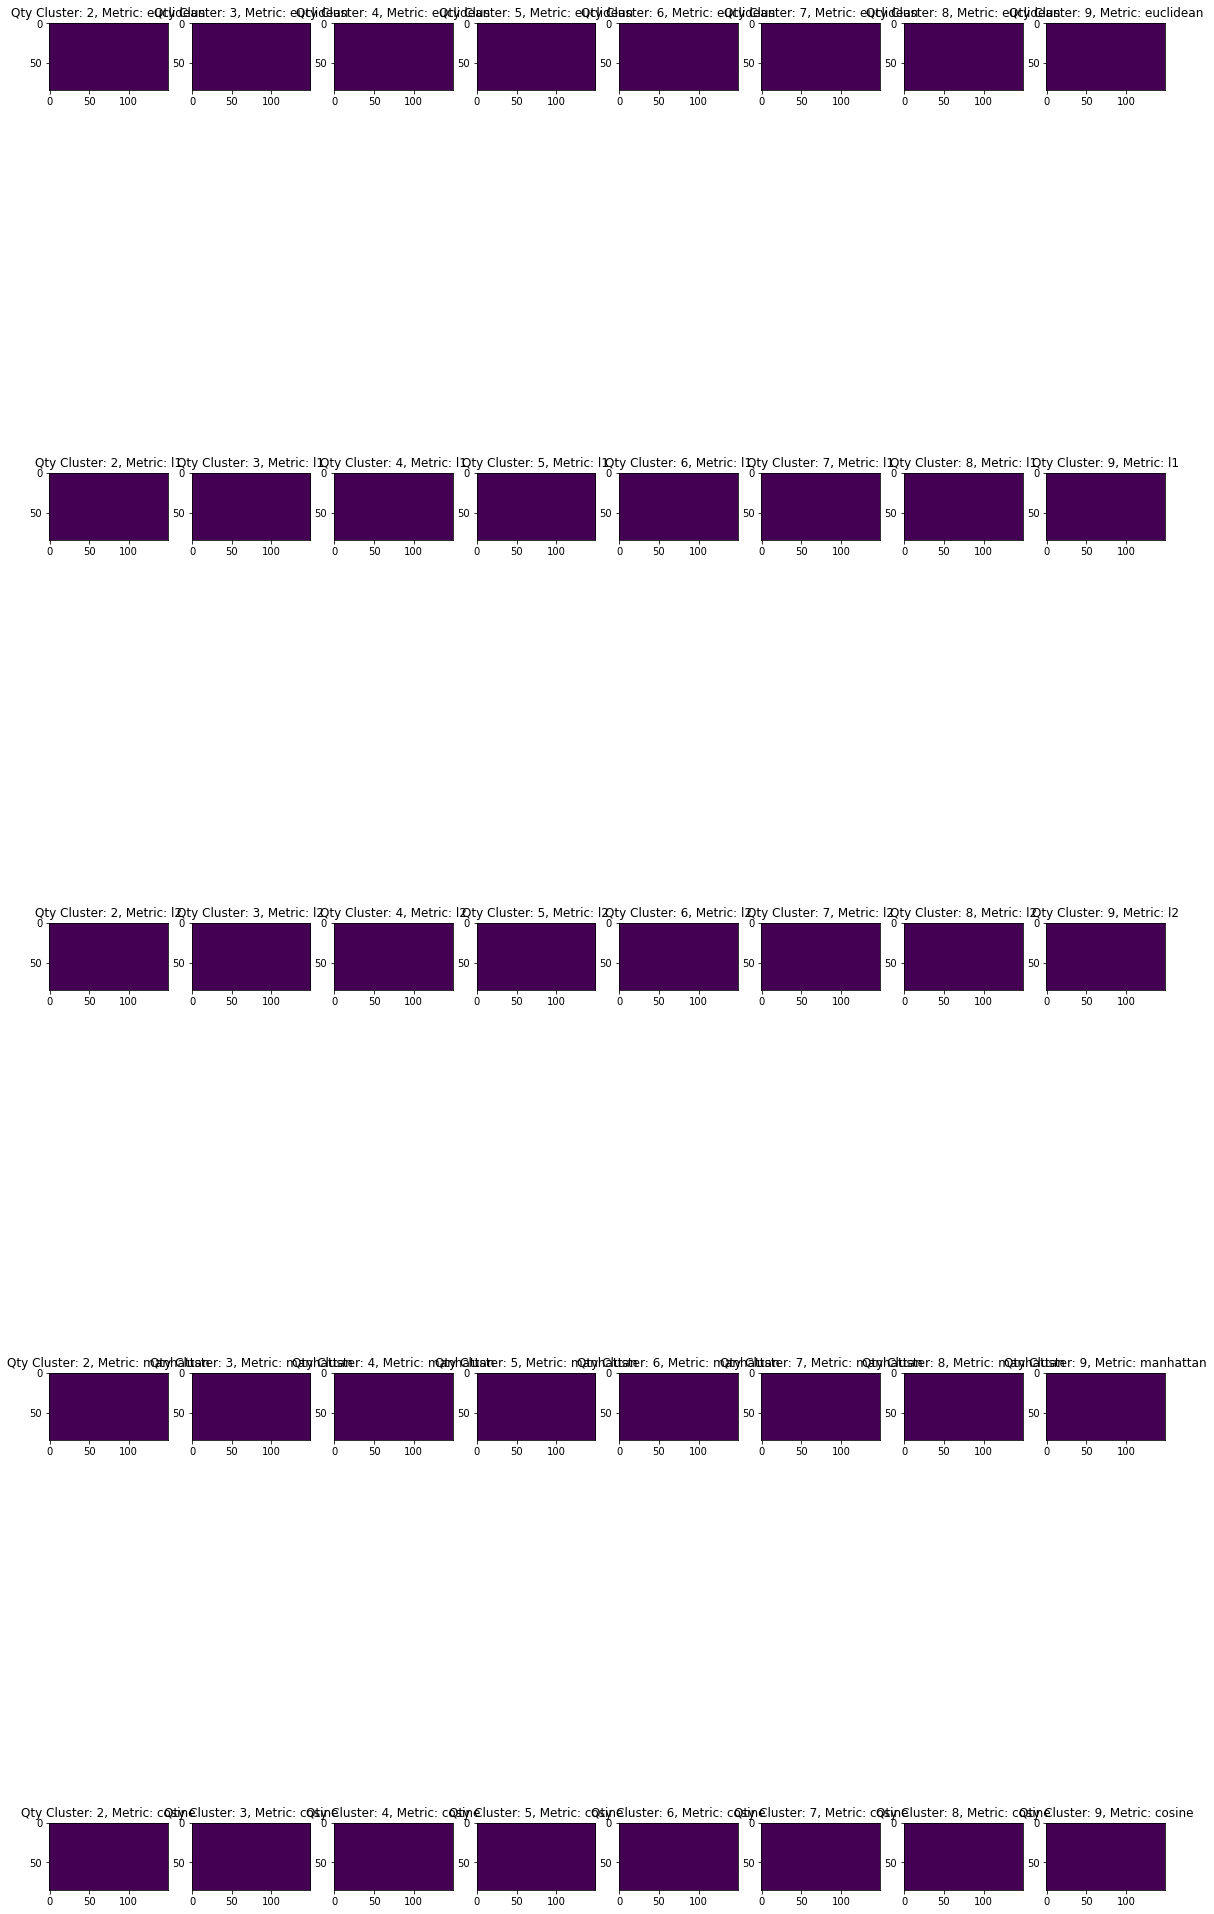

In [129]:
fig, axs = plt.subplots(nrows=5, ncols=len(range(2, 10)), figsize=(20, 40))

for idx, metric in enumerate(('euclidean', 'l1', 'l2', 'manhattan', 'cosine')):
    for jdx, nclusters in enumerate(range(2, 10)):
        plot_results_kmedoids_clustering(labels_images1_kmedoids[idx][jdx], axs[idx][jdx]);
        axs[idx][jdx].set_title('Qty Cluster: {}, Metric: {}'.format(nclusters, metric))

### KMeans++ Clustering

In [77]:
def kmeans_clustering(image_gray, n_clusters):
    
    labels = k_means(image_gray.reshape(-1, 1), n_clusters=n_clusters)[1]
    
    labels = np.reshape(labels, image_gray.shape)
    
    return labels

In [78]:
def plot_results_kmeans_clustering(image_gray, labels, n_clusters, ax):
    
    for nclusters in range(n_clusters):
        ax.contour(labels == nclusters, contours=1, colors=[plt.cm.get_cmap("Spectral")(nclusters / float(2)), ],
                   origin='image')
    
    plt.axis('off')
    plt.savefig('kmeans++_clustering_{}_clusters.png'.format(n_clusters),
                bbox_inches='tight', pad_inches=0)

#### First Image

In [79]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [80]:
image_gray_resized = resize_image_gray(image_gray)

In [81]:
labels_images_kmeans = [kmeans_clustering(image_gray_resized, nclusters) for nclusters in range(2, 10)]

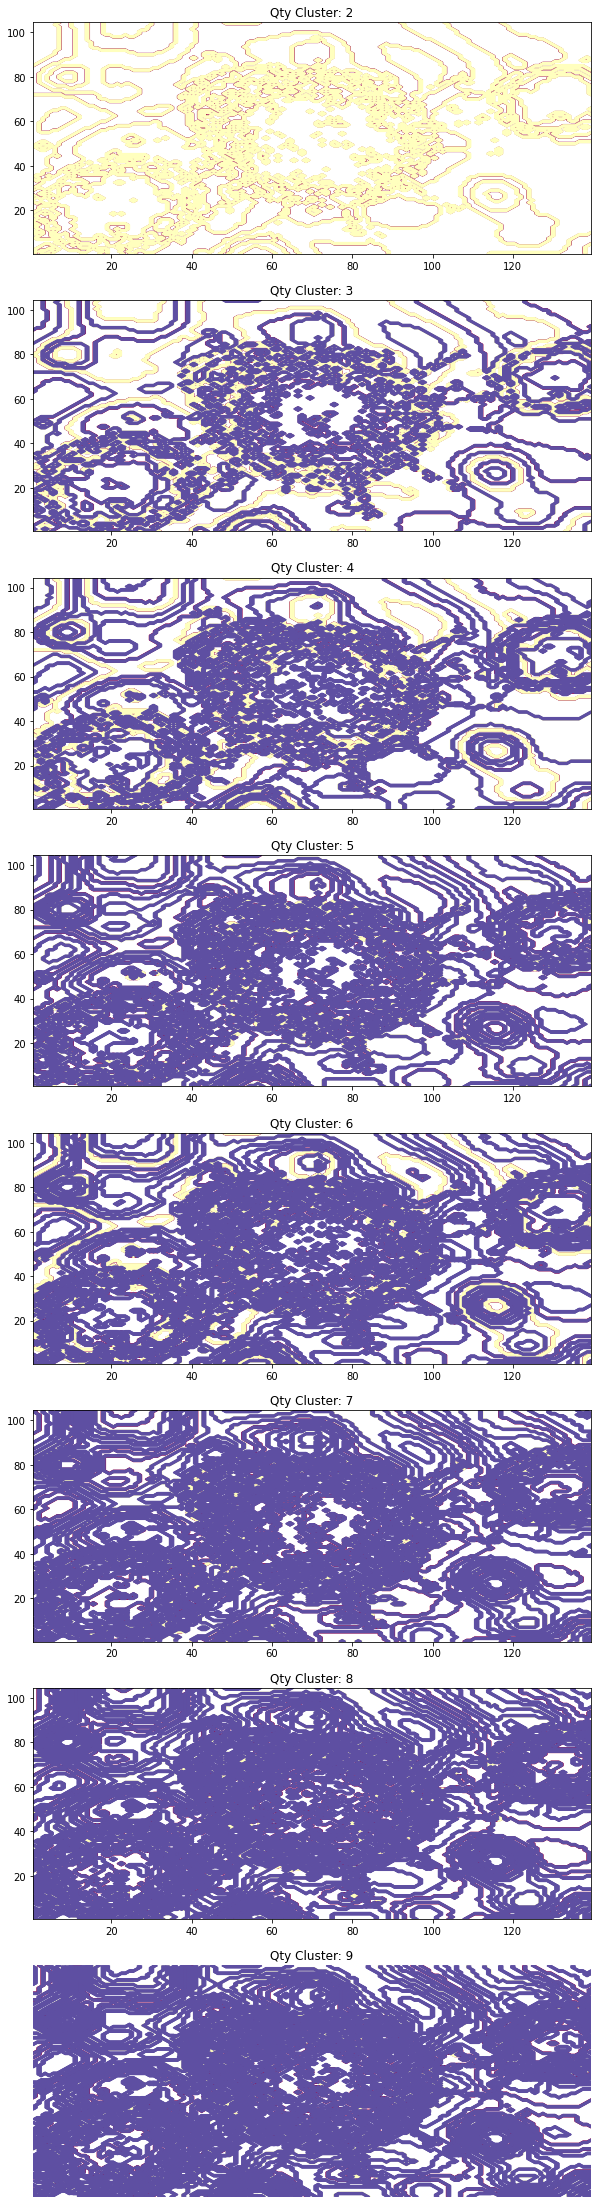

In [86]:
fig, axs = plt.subplots(nrows=len(range(2, 10)), ncols=1, figsize=(10, 40))

for idx, nclusters in enumerate(range(2, 10)):
    plot_results_kmeans_clustering(image_gray_resized, labels_images_kmeans[idx], nclusters, axs[idx]);
    axs[idx].set_title('Qty Cluster: {}'.format(nclusters))

#### Second Image

In [87]:
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

In [88]:
image1_gray_resized = resize_image_gray(image1_gray)

In [90]:
labels_images1_kmeans = [kmeans_clustering(image1_gray_resized, nclusters) 
                         for nclusters in range(2, 10)]

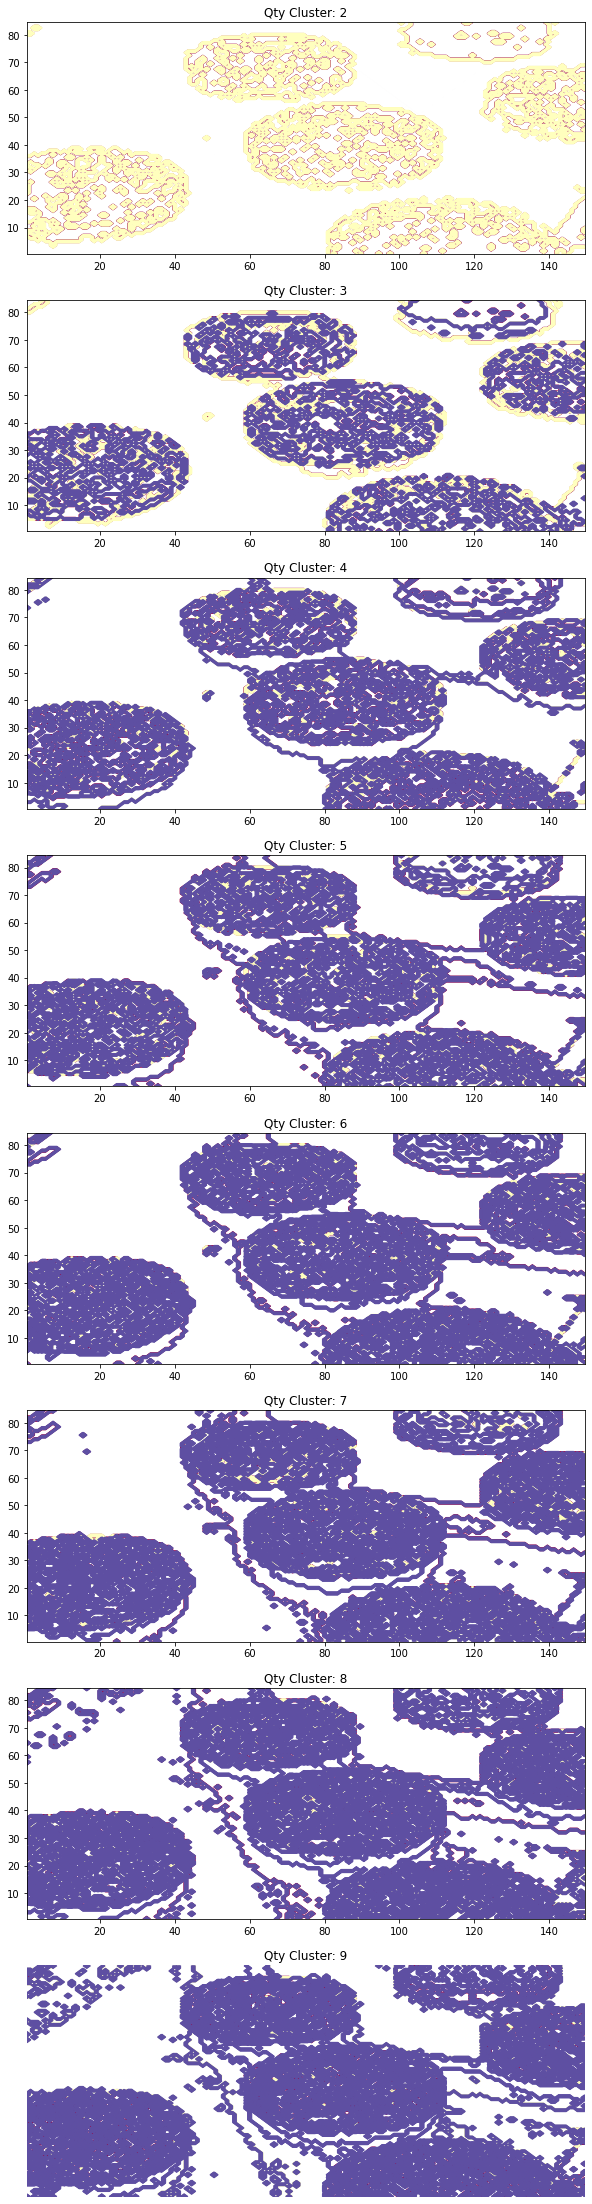

In [91]:
fig, axs = plt.subplots(nrows=len(range(2, 10)), ncols=1, figsize=(10, 40))

for idx, nclusters in enumerate(range(2, 10)):
    plot_results_kmeans_clustering(image1_gray_resized, labels_images1_kmeans[idx], nclusters, axs[idx]);
    axs[idx].set_title('Qty Cluster: {}'.format(nclusters))

Лучший алгоритм - KMeans++, при этом с увеличением количества кластеров, увеличивается и качество сегментации


Худшими алгоритмами оказались AffinityPropagation и KMedoids - не смогли выделить ни одного сегмента, при этом с 
различными гиперпараметрами


Немного лучше проявил себя Agglomerative Clustering - выделяет области-сегменты на изображении, с увеличением количества кластеров, качество сегментации растет. Но, как видно, алгоритм очень чувствителен к исходным данным - для первого изображения показал значительно худшие результаты нежели KMeans++